In [21]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
# To convert non-numeric values to numeric
def Encoder(df):
    columnsToEncode = list(df.columns)
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

In [3]:
# Read data
data = pd.read_csv('Customer_Data.csv')
data = Encoder(data)
data.head()

,Customer_ID,upsell_xsell,acct_age,credit_class,sales_channel,rfm_score,Est_HH_Income,region_US,state_US,cs_ttl_pop,cs_ttl_male,cs_ttl_female,cs_ttl_hhlds,cs_ttl_mdage,handset,data_device_age,equip_age,bill_data_usg_m03,data_usage_amt
0,7295,0,28,2,4,15,56,1,43,5604,446,601,2522,18,0,2191,3,1453,50
1,1149,0,32,0,2,20,92,0,35,5179,222,825,2723,13,0,366,36,1865,16
2,2428,0,28,2,4,20,360,7,40,3266,446,601,789,15,0,2191,28,367,1
3,4957,1,17,2,3,23,403,7,25,1284,372,675,4315,15,0,1264,36,2763,2
4,988,0,20,2,3,14,264,2,45,1157,602,445,3799,14,0,1696,22,4317,12


## Feature selection and preprocessing

In [4]:
data.corr().loc['upsell_xsell'].sort_values()

rfm_score           -0.031087
region_US           -0.020172
sales_channel       -0.015305
Customer_ID         -0.013133
cs_ttl_pop          -0.012914
data_usage_amt      -0.008861
acct_age            -0.006386
equip_age           -0.005668
cs_ttl_mdage        -0.003369
cs_ttl_male         -0.002135
cs_ttl_hhlds        -0.001480
cs_ttl_female       -0.000038
bill_data_usg_m03    0.000435
credit_class         0.003895
data_device_age      0.004980
handset              0.006844
state_US             0.023799
Est_HH_Income        0.034479
upsell_xsell         1.000000
Name: upsell_xsell, dtype: float64

In [5]:
# Feature Selection
chosen = ['state_US', 'region_US', 'cs_ttl_female', 'cs_ttl_male', 'upsell_xsell']
data_chosen = data.loc[:, chosen].dropna()

X = data_chosen.loc[:, data_chosen.columns!='upsell_xsell'].values
Y = data_chosen.loc[:, ['upsell_xsell']].values
Y = Y.reshape(-1,)

# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=120 ,test_size=0.1)

# Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [6]:
lgr = LogisticRegression(solver="liblinear", max_iter=1000)
lgr.fit(X_train, y_train)

y_pred_lgr = lgr.predict(X_test)

print(classification_report(y_test,y_pred_lgr))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       883
           1       0.00      0.00      0.00       117

    accuracy                           0.88      1000
   macro avg       0.44      0.50      0.47      1000
weighted avg       0.78      0.88      0.83      1000



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Neural Network

In [7]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

print(classification_report(y_test,y_pred_mlp))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       883
           1       0.00      0.00      0.00       117

    accuracy                           0.88      1000
   macro avg       0.44      0.50      0.47      1000
weighted avg       0.78      0.88      0.83      1000



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Decision Tree
*Best fit*

In [18]:
dt = DecisionTreeClassifier(min_samples_leaf=5)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

cm = confusion_matrix(y_test,y_pred_dt)
print('Confusion matrix:')
print('True Positives(TP) = ', cm[0,0]) 
print('True Negatives(TN) = ', cm[1,1])  
print('False Positives(FP) = ', cm[0,1]) 
print('False Negatives(FN) = ', cm[1,0])

print("\nReport:\n",classification_report(y_test,y_pred_dt))

Confusion matrix:
True Positives(TP) =  868
True Negatives(TN) =  6
False Positives(FP) =  15
False Negatives(FN) =  111

Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       883
           1       0.29      0.05      0.09       117

    accuracy                           0.87      1000
   macro avg       0.59      0.52      0.51      1000
weighted avg       0.82      0.87      0.83      1000



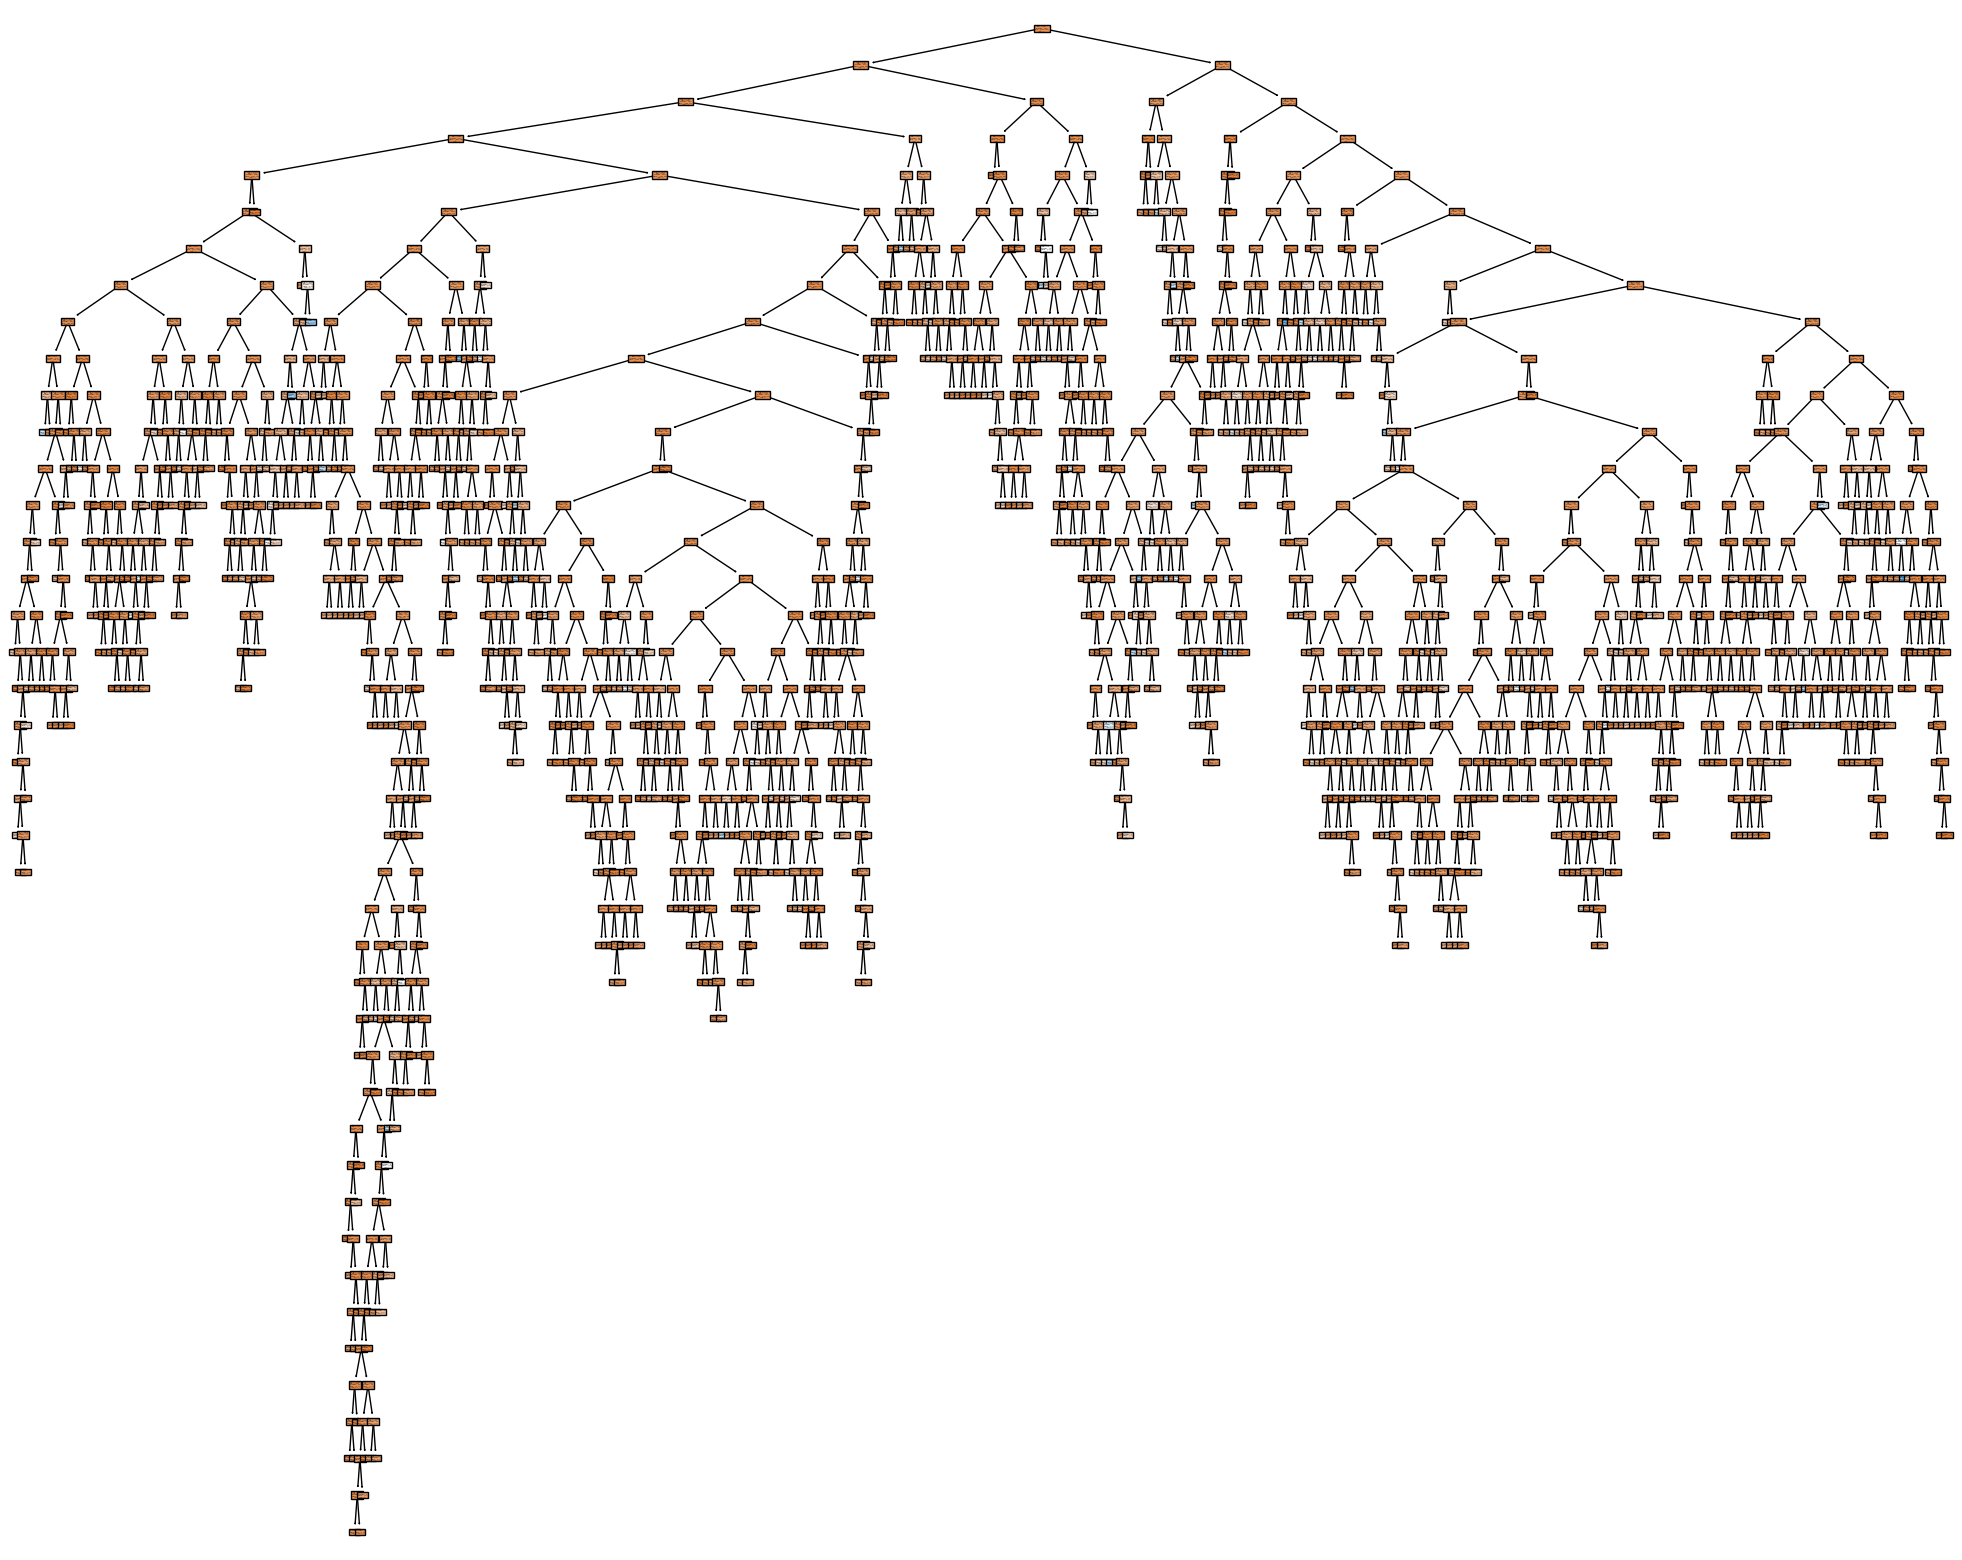

In [9]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=data_chosen.columns!='upsell_xsell',  
                   class_names='upsell_xsell',
                   filled=True)

## Support Vector Machine

In [15]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       883
           1       0.00      0.00      0.00       117

    accuracy                           0.88      1000
   macro avg       0.44      0.50      0.47      1000
weighted avg       0.78      0.88      0.83      1000



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

-ROC AUC- 
Logistic Regression: 0.5000
Neural Network: 0.5000
Decision Tree: 0.5171


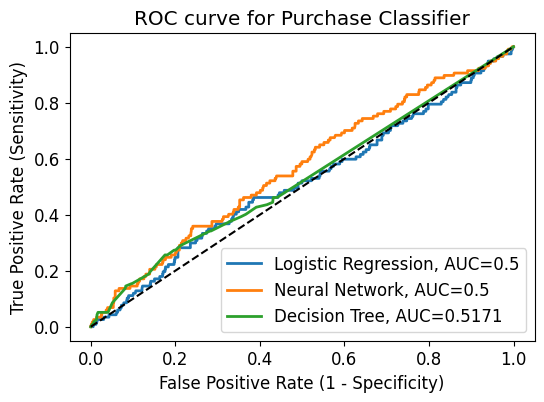

In [26]:
y_prob_lgr = lgr.predict_proba(X_test)
y_prob_mlp = mlp.predict_proba(X_test)
y_prob_dt = dt.predict_proba(X_test)

ROC_AUC_lgr = roc_auc_score(y_test, y_pred_lgr)
ROC_AUC_mlp = roc_auc_score(y_test, y_pred_mlp)
ROC_AUC_dt = round(roc_auc_score(y_test, y_pred_dt), 4)

print('-ROC AUC- ')
print('Logistic Regression: {:.4f}'.format(ROC_AUC_lgr))
print('Neural Network: {:.4f}'.format(ROC_AUC_mlp))
print('Decision Tree: {:.4f}'.format(ROC_AUC_dt))

plt.figure(0,figsize=(6,4)).clf()

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lgr[:,1], pos_label=1)
plt.plot(fpr, tpr, label="Logistic Regression, AUC="+str(ROC_AUC_lgr), linewidth=2)

fpr, tpr, thresholds = roc_curve(y_test, y_prob_mlp[:,1], pos_label=1)
plt.plot(fpr, tpr, label="Neural Network, AUC="+str(ROC_AUC_mlp), linewidth=2)

fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt[:,1], pos_label=1)
plt.plot(fpr, tpr, label="Decision Tree, AUC="+str(ROC_AUC_dt), linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Purchase Classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.legend()

plt.show()